# Analisi dati dei contagi di COVID-19

https://github.com/pcm-dpc/COVID-19

In [1]:
import pandas as pd
import numpy as np
import datetime
import datetime #import date,datetime
import os.path
import sys
import matplotlib.pyplot as plt
from scipy.misc import derivative

## Preparazione

https://pymotw.com/2/datetime/

In [2]:
lista_reg = list( [ 'Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', \
             'Liguria', 'Lombardia', 'Marche', 'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia', \
             'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto' ])

In [3]:
root = "dpc-covid19-ita-regioni-"
latest_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/\
dati-regioni/dpc-covid19-ita-regioni-latest.csv"

github_fmt = "%Y%m%d"
es_fmt = "%Y-%m-%d"
plt_fmt = "%b %Y"

data_dir = "data/"
time_series_dir = "time series/"
reg_dir = "Regioni/"
raw_dir = "raw/"

first_day = datetime.date(year=2020, month=2, day=24)  # 24 febbraio 2020
today = datetime.date.today()
today = datetime.date(year=today.year, month=today.month,
                      day=today.day)  # today
one_day = datetime.timedelta(days=1)

print("first day   :", first_day)
print("today       :", today)
print("passed days :", (today - first_day).days)

first day   : 2020-02-24
today       : 2020-11-11
passed days : 261


In [4]:
def tostr(date,fmt=github_fmt):
    return date.strftime(fmt)

In [5]:
def dropdata(df):
    df.drop(["data","stato","codice_regione","lat","long","note"],axis=1, inplace=True)
    return df

In [6]:
def getfile(date):
    return directory + tostr(date,es_fmt) + ".csv"

## Download

In [7]:
# impostazione per sovrascrivere i file
overwrite = False

In [8]:
#
directory = data_dir + reg_dir + raw_dir

#
N = (today - first_day).days
k=0
for i in range(N):
    date      = first_day + i*one_day 
    file_path = getfile(date)
    if False == os.path.exists(file_path) and overwrite == False:
        k=k+1
        print("Downloading file (",i+1,"/",N,"): ",tostr(date,es_fmt),end="\r")
        url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/'\
        +root+tostr(date,github_fmt)+".csv"
        df  = pd.read_csv(url)
        df = dropdata(df)
        df.to_csv(file_path,index=False)
print("\nDone (downloaded file: ",k,")")


Done (downloaded file:  0 )


In [9]:
# https://stackoverflow.com/questions/1392413/calculating-a-directorys-size-using-python/1392549
def get_size(start_path = '.',unit="bytes"):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    if unit == "bytes" :
        return total_size
    elif unit == "Kb" or unit == "Kilobytes" :
        return total_size/1024

print("Folder size : ",get_size(directory,"Kb")," Kb")

Folder size :  422.271484375  Kb


## Dataframe di esempio

In [10]:
df = pd.read_csv(getfile(first_day))
df

,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
0,Abruzzo,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN
1,Basilicata,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN
2,Calabria,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN
3,Campania,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN
4,Emilia-Romagna,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN
5,Friuli Venezia Giulia,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN
6,Lazio,1,1,2,0,2,0,2,1,0,NaN,NaN,3,124,NaN
7,Liguria,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN
8,Lombardia,76,19,95,71,166,0,166,0,6,NaN,NaN,172,1463,NaN
9,Marche,0,0,0,0,0,0,0,0,0,NaN,NaN,0,16,NaN


In [11]:
print(list(df["denominazione_regione"]))

['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto']


## Serie storiche

https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

In [12]:
cols = [ 'ricoverati_con_sintomi' , 'terapia_intensiva' , \
        'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',\
        'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',\
        'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',\
        'totale_casi', 'tamponi', 'casi_testati']# + 'denominazione_regione'

In [13]:
# per ogni variabile creo un file con:
# colonne : data, tutte le regioni
# righe   : date
overwrite = False

# ciclo sulle variabili
N = (today - first_day).days
k=0
for c in cols:
    #
    print(k+1,"/",len(cols),"(",c,")",end="\r")
    # nome del file contenente il dataframe
    outname = c + ".csv" 
    outdir  = data_dir + reg_dir + time_series_dir
    file_time_series = os.path.join(outdir, outname)  
    #file_time_series = data_dir + reg_dir + time_series_dir + c + ".csv"
    # controllo se ho già creato questo file
    if os.path.exists(file_time_series) is True and overwrite is False :
        #print("Read")
        # in caso affermativo lo leggo e lo agggiorno
        time_series = pd.read_csv(file_time_series)
        time_series.set_index("Data",inplace=True,drop=False)
    else:
        # in caso negativo creo da zero il dataframe
        time_series = pd.DataFrame()
        time_series["Data"] = []
        for i in lista_reg:
            time_series[i] = []
        time_series.set_index("Data",inplace=True,drop=False)

    # ciclo su tutte le date (mancanti) ed inserisco i dati
    stampa_primo = False
    for i in range(N):
        #
        date = first_day + i * one_day
        date_str = tostr(date, es_fmt)
        #
        if stampa_primo is True :
            string = str(k+1)+"/"+str(len(cols))+" ("+ str(c)+") | date ("+str(i+1)+"/"+str(N)+"): "+date_str+"    "# \
            #+str(S)+str(stampa_primo)
            print(string,end="\r",flush=True)                
        
        # cerco se ho già la data
        if date_str in time_series["Data"] and overwrite is True:
            time_series = time_series.drop(date_str)
        #
        if date_str not in time_series["Data"] or overwrite is True:
            #if stampa_primo is False :
            stampa_primo = True
            #S = i
            #print("ciao")
            file_path = getfile(date)
            df = pd.read_csv(file_path)
            df = df.set_index("denominazione_regione")
            # aggiungo la data
            append = {"Data": date_str }
            for j in lista_reg :
                 append[j] = df[c][lista_reg][j]
            time_series = time_series.append(append,ignore_index=True)
            # aggiungo i valori per ogni regione
            #time_series.iloc[date_str,lista_reg] = list(df[c][lista_reg])
            #del df
    
    #
    print("")
    time_series.to_csv(file_time_series,index=False)
    k=k+1

1 / 14 ( ricoverati_con_sintomi )
2 / 14 ( terapia_intensiva )
3 / 14 ( totale_ospedalizzati )
4 / 14 ( isolamento_domiciliare )
5 / 14 ( totale_positivi )
6 / 14 ( variazione_totale_positivi )
7 / 14 ( nuovi_positivi )
8 / 14 ( dimessi_guariti )
9 / 14 ( deceduti )
10 / 14 ( casi_da_sospetto_diagnostico )
11 / 14 ( casi_da_screening )
12 / 14 ( totale_casi )
13 / 14 ( tamponi )
14 / 14 ( casi_testati )


## Confronto regioni

In [14]:
regs  = ["Lombardia","Piemonte","Veneto","Toscana","Lazio","Campania"]
#lista_reg

In [15]:
cols

['ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati']

In [16]:
def plt_time_series(ts,var,regs,title,Lambda= lambda x : x ):
    outname = var + ".csv" 
    outdir  = data_dir + reg_dir + time_series_dir
    file_time_series = os.path.join(outdir, outname) 

    #
    ts = pd.read_csv(file_time_series)

    #
    xticks = [ i for i in ts["Data"] if datetime.datetime.strptime(i,es_fmt).day == 1 ]
    xlabel = [ datetime.datetime.strftime(datetime.datetime.strptime(i,es_fmt),plt_fmt) for i in xticks ]

    #
    fig, ax = plt.subplots(figsize=(15, 5)) #plt.figure()
    for r in regs :
        plt.plot(ts["Data"],ts[r],label=r)

    plt.xticks(ticks=xticks,labels=xlabel,rotation=45)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

### Totale positivi

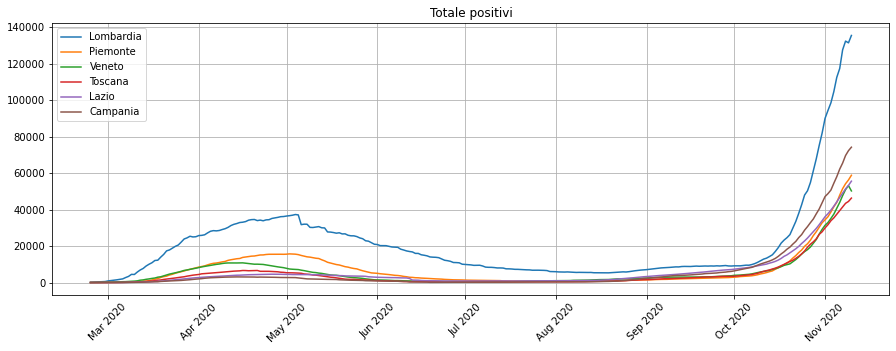

In [17]:
plt_time_series(ts=time_series,var= "totale_positivi",regs=regs,title = "Totale positivi")

### Terapie intensive

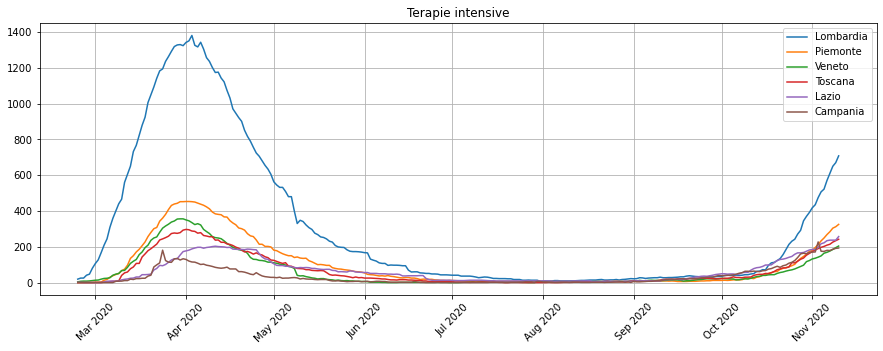

In [18]:
plt_time_series(ts=time_series,var= "terapia_intensiva",regs=regs,title = "Terapie intensive")

### Deceduti

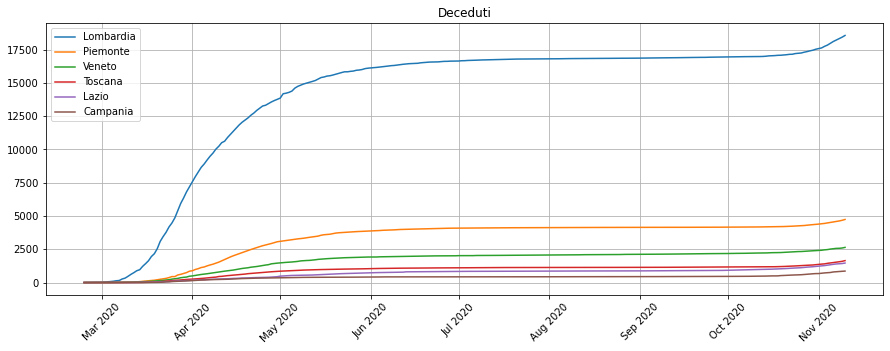

In [19]:
plt_time_series(ts=time_series,var= "deceduti",regs=regs,title = "Deceduti")

### Nuovi positivi

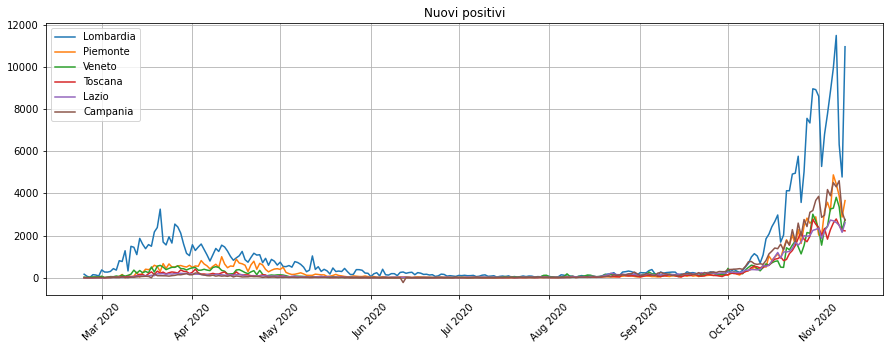

In [20]:
# bisognerebbe fare una media mobile
plt_time_series(ts=time_series,var= "nuovi_positivi",regs=regs,title = "Nuovi positivi")